In [17]:
import pandas as pd
import numpy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")
#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 8,6

In [18]:
df = pd.read_csv("CleanedNewsData.csv",low_memory=False)

# Category Distribution Before Feature Engineering

Text(0, 0.5, 'Count')

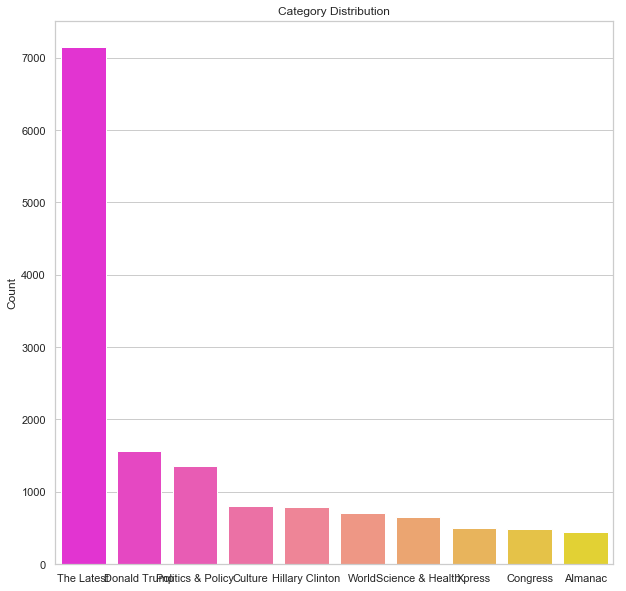

In [19]:

#Category Term Distribution
plt.figure(figsize=(10, 10))
sns.barplot(y=df.category.value_counts()[:10], x=df.category.value_counts().index[:10], palette='spring')
plt.xticks(rotation=0)
plt.title("Category Distribution")
plt.ylabel("Count")

In [20]:
df = pd.read_csv("newdatasetfinal.csv",low_memory=False)

# Category Distribution after Feature Engineering

Text(0, 0.5, 'Count')

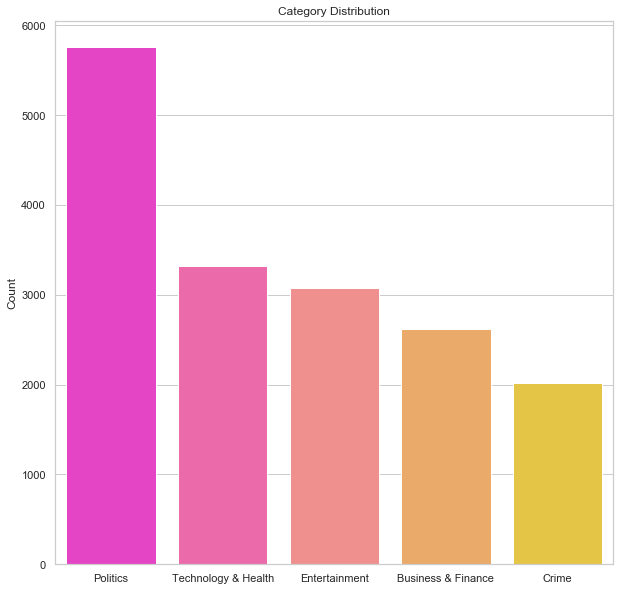

In [21]:
#Category Term Distribution
plt.figure(figsize=(10, 10))
sns.barplot(y=df.NewCategory.value_counts()[:10], x=df.NewCategory.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.title("Category Distribution")
plt.ylabel("Count")

# Word Cloud for Categories

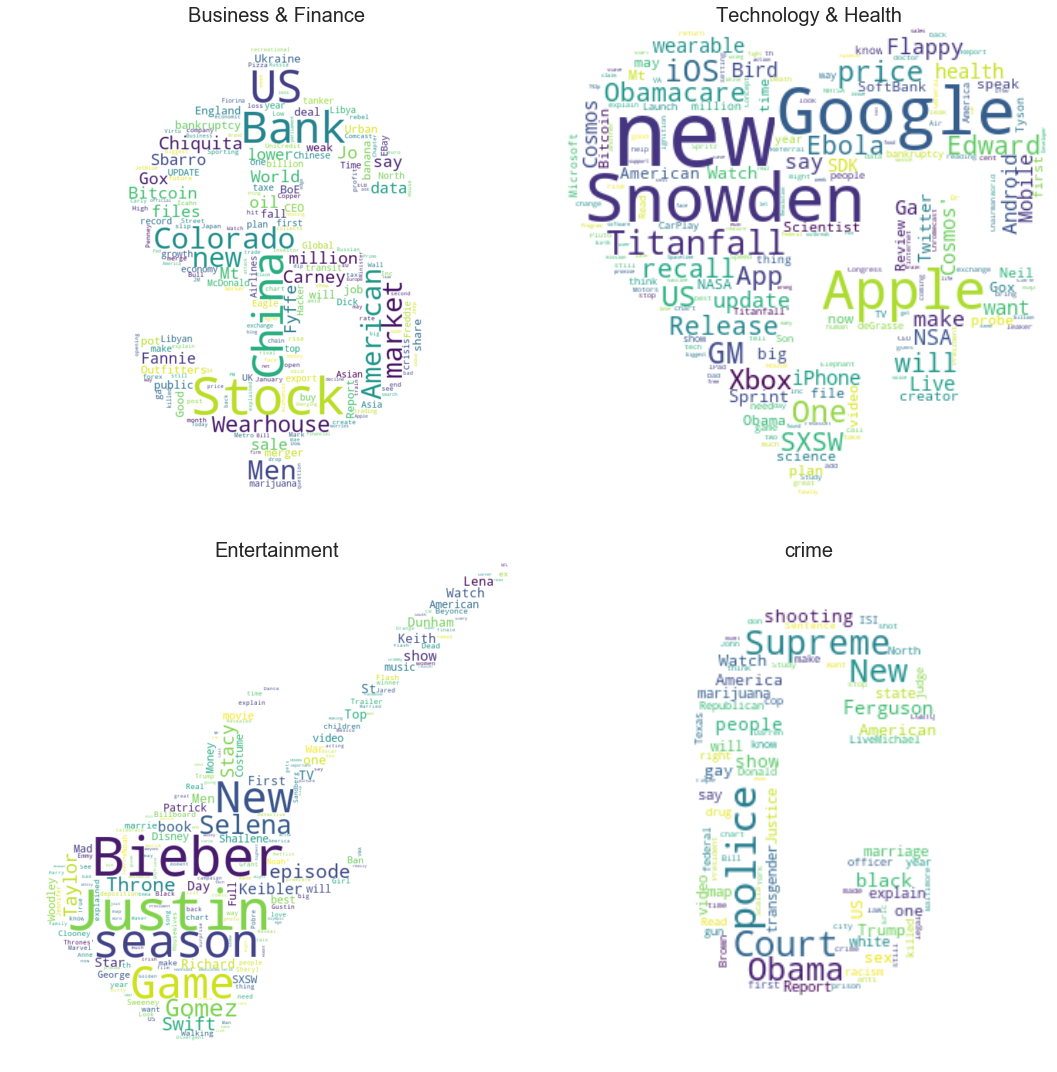

In [22]:
# necessary libraries for wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np


# create dataframe for each category
b_news = df.loc[df['NewCategory'] == 'Business & Finance'] # business
t_news = df.loc[df['NewCategory'] == 'Technology & Health'] # health and technology
e_news = df.loc[df['NewCategory'] == 'Entertainment'] # entertainment 
m_news = df.loc[df['NewCategory'] == 'Crime'] # crime

# convert news titles to usable strings for the word clouds
b_title = b_news['title'].to_string()
t_title = t_news['title'].to_string()
e_title = e_news['title'].to_string()
m_title = m_news['title'].to_string()

# import images and make them usable by word cloud
b_image = np.array(Image.open("C:\\Users\\Sonal Thube\\Desktop\\WORDCLOUD\\business.jpg"))
t_image = np.array(Image.open("C:\\Users\\Sonal Thube\\Desktop\\WORDCLOUD\\health.jpg"))
e_image = np.array(Image.open("C:\\Users\\Sonal Thube\\Desktop\\WORDCLOUD\\entertainment.jpg"))
m_image = np.array(Image.open("C:\\Users\\Sonal Thube\\Desktop\\WORDCLOUD\\crime.jpg"))


fig = plt.figure(figsize=(15,15))

# setting stop-words, so words like "the" and "it" are ignored
stopwords = set(STOPWORDS)

# business news cloud
ax1 = fig.add_subplot(221)
b_wordcloud = WordCloud(background_color='white', mask=b_image, collocations=False, stopwords=stopwords).generate(b_title)
ax1.imshow(b_wordcloud, interpolation='bilinear')
ax1.set_title('Business & Finance', size=20)
ax1.axis('off')

# science and technology news cloud
ax2 = fig.add_subplot(222)
t_wordcloud = WordCloud(background_color='white', mask=t_image, collocations=False, stopwords=stopwords).generate(t_title)
ax2.imshow(t_wordcloud, interpolation='bilinear')
ax2.set_title('Technology & Health', size=20)
ax2.axis('off')

# entertainment news cloud
ax3 = fig.add_subplot(223)
e_wordcloud = WordCloud(background_color='white', mask=e_image, collocations=False, stopwords=stopwords).generate(e_title)
ax3.imshow(e_wordcloud, interpolation='bilinear')
ax3.set_title('Entertainment', size=20)
ax3.axis('off')

# health news cloud
ax4 = fig.add_subplot(224)
m_wordcloud = WordCloud(background_color='white', mask=m_image, collocations=False, stopwords=stopwords).generate(m_title)
ax4.imshow(m_wordcloud, interpolation='bilinear')
ax4.set_title('crime', size=20)
ax4.axis('off')

fig.tight_layout()

In [6]:
df = pd.read_csv("Project-AcurracyGraph.csv",low_memory=False)
df.head()

,Models,Acurracy
0,Random Forest,81.95
1,SVM,80.88
2,SGD,82.34
3,MLP,79.00
4,MNB,80.55


# Accuracy Graph of Models 

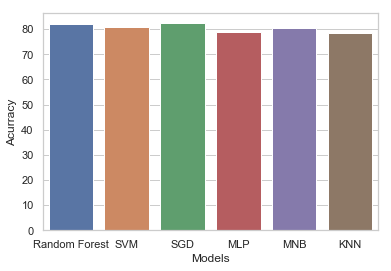

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="Models", y="Acurracy", data=df)
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

# Category Percentage

(-1.1212660257337572,
 1.1010126678920837,
 -1.1144114010243673,
 1.108230423779538)

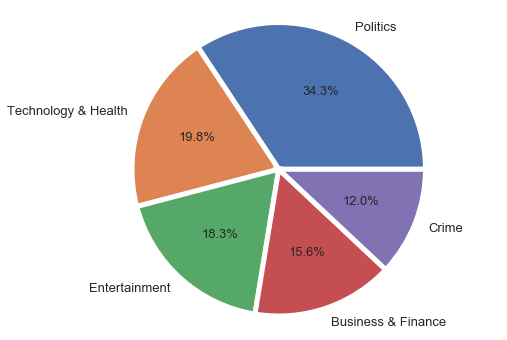

In [16]:
df = pd.read_csv("newdatasetfinal.csv")
df.NewCategory.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')

In [72]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Confusion Matrix for all Models

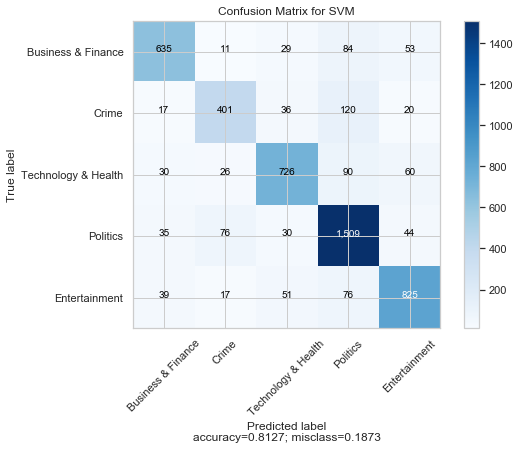

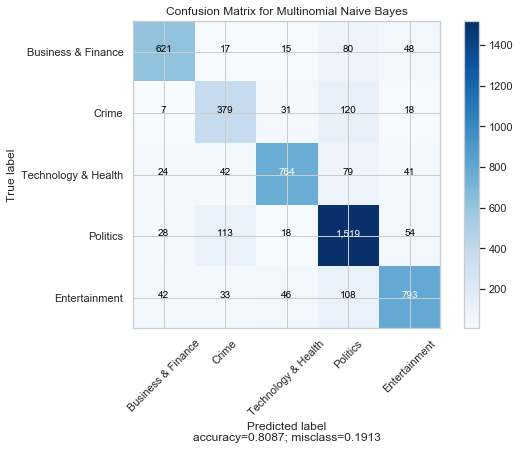

In [56]:
plot_confusion_matrix(cm           = np.array ( [ [ 635,   11,   29,   84,   53],
                                                 [  17,  401,   36,  120,   20],
                                                 [  30,   26,  726,   90,   60],
                                                 [  35,   76,   30, 1509,   44],
                                                 [  39,   17,   51,   76,  825]]), 
                                     
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for SVM")
                      
                      
                      
plot_confusion_matrix(cm           = np.array ([[ 621,   17,   15,   80,   48],
                                                [   7,  379,   31,  120,   18],
                                                [  24,   42,  764,   79,   41],
                                                [  28,  113,   18, 1519,   54],
                                                [  42,   33,   46,  108,  793]]), 
                                     
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for Multinomial Naive Bayes")



                      

                      
                      
                      
                      
                      
                      

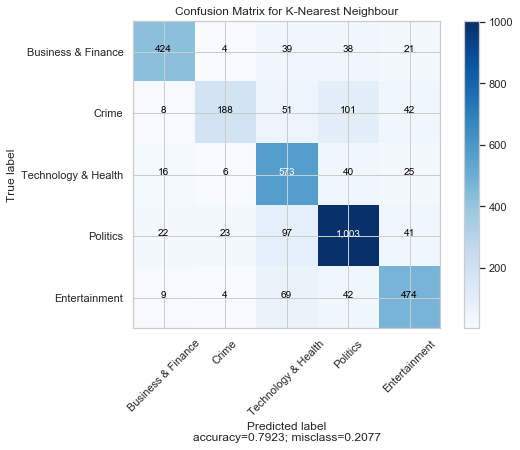

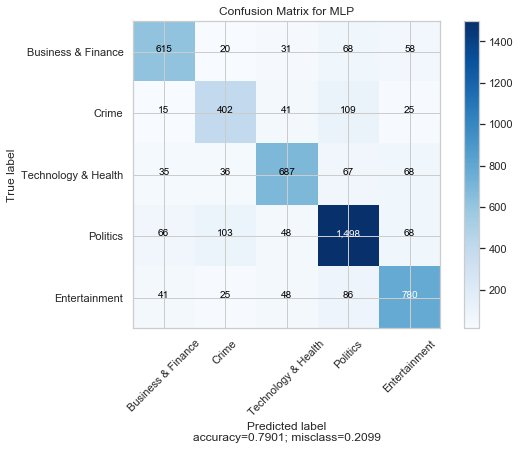

In [64]:

plot_confusion_matrix(cm           =np.array([[ 424,    4,   39,   38,   21],
                                            [   8,  188,   51,  101,   42],
                                            [  16,    6,  573,   40,   25],
                                            [  22,   23,   97, 1003,   41],
                                            [   9,    4,   69,   42,  474]]), 
                                     
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for K-Nearest Neighbour")


                      
plot_confusion_matrix(cm           = np.array ([[ 615,   20,   31,   68,   58],
                                               [  15,  402,   41,  109,   25],
                                               [  35,   36,  687,   67,   68],
                                               [  66,  103,   48, 1498,   68],
                                               [  41,   25,   48,   86,  780]]), 
                                     
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for MLP")


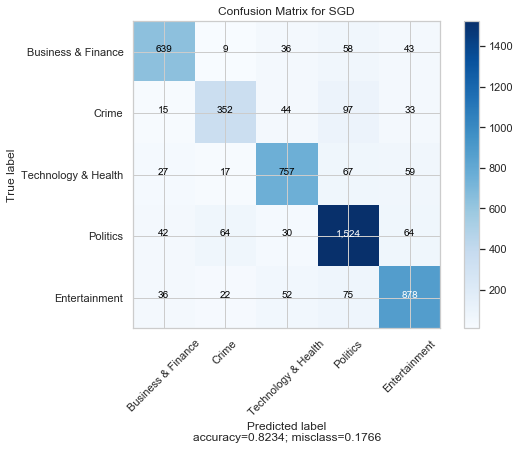

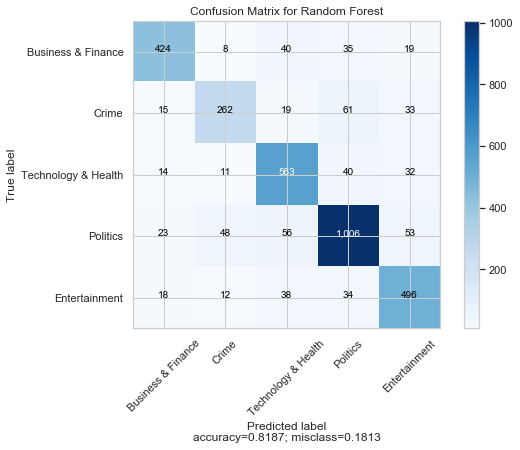

In [78]:
plot_confusion_matrix(cm           = np.array ([[ 639,    9,   36,   58,   43],
                                                [  15,  352,   44,   97,   33],
                                                [  27,   17,  757,   67,   59],
                                                [  42,   64,   30, 1524,   64],
                                                [  36,   22,   52,   75,  878]]), 
                                     
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for SGD")



                      
plot_confusion_matrix(cm           = np.array ([[ 424,   8,   40,   35,   19],
                                               [  15,  262,   19,   61,   33],
                                               [  14,   11,  563,   40,   32],
                                               [  23,   48,   56, 1006,   53],
                                               [  18,   12,   38,   34,  496]]), 
                                     
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for Random Forest")


                      
